# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:

Import the necessary libraries and create your dataframe(s).

In [57]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [58]:
df = pd.read_csv("/Users/benjaminteter/Desktop/Coding/data-analysis-projects/cleaning-data-checkpoint/simpsons_episodes.csv")

In [59]:
df.head()

,id,title,description,original_air_date,production_code,directed_by,written_by,season,number_in_season,number_in_series,us_viewers_in_millions,imdb_rating,tmdb_rating,tmdb_vote_count
0,0,Simpsons Roasting on an Open Fire,Homer is forced to become a department store S...,1989-12-17,7G08,David Silverman,Mimi Pond,1,1,1,26.7,8.1,6.921,101
1,1,Bart the Genius,Bart ends up at a school for gifted children a...,1990-01-14,7G02,David Silverman,Jon Vitti,1,2,2,24.5,7.7,7.400,62
2,2,Homer's Odyssey,"After losing his job, Homer contemplates endin...",1990-01-21,7G03,Wes Archer,Jay Kogen & Wallace Wolodarsky,1,3,3,27.5,7.3,6.500,58
3,3,There's No Disgrace Like Home,After being embarrassed by the rest of the fam...,1990-01-28,7G04,Gregg Vanzo & Kent Butterworth,Al Jean & Mike Reiss,1,4,4,20.2,7.7,7.200,52
4,4,Bart the General,After being beaten up by Nelson Muntz one too ...,1990-02-04,7G05,David Silverman,John Swartzwelder,1,5,5,27.1,7.9,6.900,53


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [79]:
df.isna() #checks for null values, creates data frame where all values are replaced with a boolean value where null is True, otherwise False.
#at a quick glance, there are no obvious values.

,id,title,description,original_air_date,production_code,directed_by,written_by,season,number_in_season,number_in_series,us_viewers_in_millions,imdb_rating,tmdb_rating,tmdb_vote_count
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,False,False,False,False,False,False,False,False,False,False,False,False,False,False
743,False,False,False,False,False,False,False,False,False,False,False,False,False,False
744,False,False,False,False,False,False,False,False,False,False,False,False,False,False
745,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [80]:
df.isna().sum() #gives sum of all null values per column.
#dataset only has one null value, located in us_viewers_in_millions

id                        0
title                     0
description               0
original_air_date         0
production_code           0
directed_by               0
written_by                0
season                    0
number_in_season          0
number_in_series          0
us_viewers_in_millions    1
imdb_rating               0
tmdb_rating               0
tmdb_vote_count           0
dtype: int64

In [83]:
#to get rid of that null value, I want to replace the value with the average value from this column.

x = df["us_viewers_in_millions"].mean() # x = the average viewership number

df = df.fillna(x) # fillna replaces any NaN values in the DataFrame with the average viewership number

In [84]:
df.isna().sum() #double check to see if null value has been replaced.

#us_viewers_in_millions has 0 null values.

id                        0
title                     0
description               0
original_air_date         0
production_code           0
directed_by               0
written_by                0
season                    0
number_in_season          0
number_in_series          0
us_viewers_in_millions    0
imdb_rating               0
tmdb_rating               0
tmdb_vote_count           0
dtype: int64

NOTE: In this use case, a single null value is not going to impact my analysis. To keep everything uniform, I filled that null value with the average value from that column. 

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

NOTE: The areas where irregular data could effect my analysis is in the US Viewers column and the IMDB Rating column.
I will run the describe function to remind myself of all the summary statistics of my data.

In [86]:
df.describe()

# Checking column's min and max values to see if any outliers can be detected.
# Nothing looks off. 


,id,season,number_in_season,number_in_series,us_viewers_in_millions,imdb_rating,tmdb_rating,tmdb_vote_count
count,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,373.000000,17.444444,11.610442,374.325301,10.384531,7.150870,6.379029,18.070950
std,215.784615,9.734715,6.497023,216.271060,6.958546,0.818934,0.879565,8.874704
min,0.000000,1.000000,1.000000,1.000000,0.770000,4.000000,0.000000,1.000000
25%,186.500000,9.000000,6.000000,187.500000,4.760000,6.600000,5.800000,14.000000
50%,373.000000,17.000000,12.000000,374.000000,9.020000,7.000000,6.300000,17.000000
75%,559.500000,26.000000,17.000000,560.500000,14.825000,7.700000,7.000000,23.000000
max,746.000000,34.000000,25.000000,750.000000,33.600000,9.300000,8.600000,101.000000


Text(0, 0.5, 'US Viewers (Millions)')

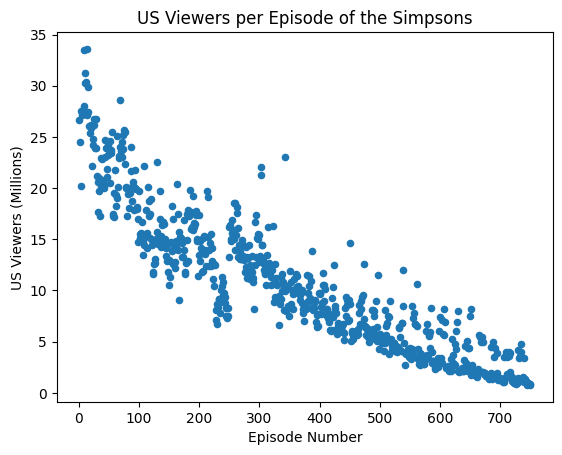

In [95]:
#scatter plot to see if there are any outliers in my US viewers count
ax = df.plot.scatter(x="number_in_series",y="us_viewers_in_millions") #x axis is ID, which is each individual episode, y is viwership numbers
ax.set_title("US Viewers per Episode of the Simpsons")
ax.set_xlabel("Episode Number")
ax.set_ylabel("US Viewers (Millions)")

## add title
# Nothing appears to be irregular here.

Text(0, 0.5, 'Rating')

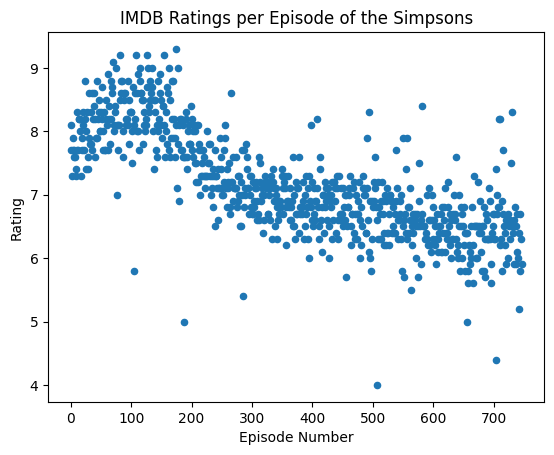

In [96]:
ax2 = df.plot.scatter(x="id",y="imdb_rating") #same idea as above, but for IMDB ratings

ax2.set_title("IMDB Ratings per Episode of the Simpsons")
ax2.set_xlabel("Episode Number")
ax2.set_ylabel("Rating")

#There are a few spots here that fall outside of the general ratings of other episodes.

In [97]:
#looking closer at episodes with a IMDB rating lower than a 6. Which is below where the majority of ratings are.
low_rated = df[df['imdb_rating'] < 6]
low_rated

# my conclusion is that there are outliers, but they are meaningful. The points in the graph outside the overall cluster, are truly just poorly rated episodes.
# After verifying ratings and reviews on IMDB and Simpsons Wikipedia, I was able to confirm these episodes had poor response from critics and the public. 
# I discovered these low rated episodes in my EDA.
## Episode 508 (Lisa Goes Gaga), which may look like an outlier, is the lowest rated episode of all time. 

# Examples that support this conclusion : 
# "Lisa Goes Gaga" IMDB page, 4/10 stars. Mentions this is the lowest rated episode of all time - https://www.imdb.com/title/tt2403733/ 
# "Moe Goes from Rags to Riches" Wikipeida. Critical Response section mentions negative reviews from critics, and that "Several websites named this episode as one of the worst episodes of The Simpsons"



,id,title,description,original_air_date,production_code,directed_by,written_by,season,number_in_season,number_in_series,us_viewers_in_millions,imdb_rating,tmdb_rating,tmdb_vote_count
105,105,Another Simpsons Clip Show,The family recalls past tales of lost love.,1994-09-25,2F33,David Silverman,Jon Vitti,6,3,106,13.50,5.8,6.0,20
188,188,"All Singing, All Dancing",Homer is disappointed when the western he rent...,1998-01-04,5F24,Mark Ervin,Steve O'Donnell,9,11,189,15.90,5.0,4.1,21
285,285,Gump Roast,"In this clip show, the citizens of Springfield...",2002-04-21,DABF12,Mark Kirkland,Deb Lacusta & Dan Castellaneta,13,17,286,12.26,5.4,5.1,14
456,456,The Greatest Story Ever D'ohed,Ned takes the Simpsons on a pilgrimage to Isra...,2010-03-28,MABF10,Mike Frank Polcino,Kevin Curran,21,16,457,5.69,5.7,5.4,17
497,497,Moe Goes from Rags to Riches,While Bart tries to regain Milhouse's friendsh...,2012-01-29,PABF05,Bob Anderson,Tim Long,23,12,498,5.12,5.8,5.7,15
507,507,Lisa Goes Gaga,After a desperate attempt by Lisa to become mo...,2012-05-20,PABF14,Matthew Schofield,Tim Long,23,22,508,4.82,4.0,4.9,19
548,548,What to Expect When Bart's Expecting,Bart becomes a savior to Springfield couples t...,2014-04-27,SABF14,Matthew Nastuk,John Frink,25,19,549,3.45,5.8,5.7,14
552,552,Clown in the Dumps,Krusty has a crisis of conscience and retires ...,2014-09-28,SABF20,Steven Dean Moore,Joel H. Cohen,26,1,553,8.53,5.7,5.3,16
563,563,The Musk Who Fell to Earth,"Inventor Elon Musk comes to Springfield, and H...",2015-01-25,TABF04,Matthew Nastuk,Neil Campbell,26,12,564,3.29,5.5,6.8,16
574,574,Every Man's Dream,Marge decides it's finally time to separate fr...,2015-09-27,TABF14,Matthew Nastuk,J. Stewart Burns,27,1,575,3.28,5.7,5.4,21


NOTE : 
I did find there to be outliers, but they are all meaningful to my final analysis. Any data points that deviate from the norm are still important to my analysis because I need to be able to show the ratings of any given episode. If an episode is very poorly rated, it gives context to my overall business questions.

Therefor, I am not removing any outliers.

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [70]:
# When doing my EDA, I took note of some columns I want to drop
#I want to drop columns that provide information that is unnecessary to my analysis.

df.head() #run the head just to remind myself of what all my columns look like

,id,title,description,original_air_date,production_code,directed_by,written_by,season,number_in_season,number_in_series,us_viewers_in_millions,imdb_rating,tmdb_rating,tmdb_vote_count
0,0,Simpsons Roasting on an Open Fire,Homer is forced to become a department store S...,1989-12-17,7G08,David Silverman,Mimi Pond,1,1,1,26.7,8.1,6.921,101
1,1,Bart the Genius,Bart ends up at a school for gifted children a...,1990-01-14,7G02,David Silverman,Jon Vitti,1,2,2,24.5,7.7,7.400,62
2,2,Homer's Odyssey,"After losing his job, Homer contemplates endin...",1990-01-21,7G03,Wes Archer,Jay Kogen & Wallace Wolodarsky,1,3,3,27.5,7.3,6.500,58
3,3,There's No Disgrace Like Home,After being embarrassed by the rest of the fam...,1990-01-28,7G04,Gregg Vanzo & Kent Butterworth,Al Jean & Mike Reiss,1,4,4,20.2,7.7,7.200,52
4,4,Bart the General,After being beaten up by Nelson Muntz one too ...,1990-02-04,7G05,David Silverman,John Swartzwelder,1,5,5,27.1,7.9,6.900,53


In [71]:
df.columns #list my columns

Index(['id', 'title', 'description', 'original_air_date', 'production_code',
       'directed_by', 'written_by', 'season', 'number_in_season',
       'number_in_series', 'us_viewers_in_millions', 'imdb_rating',
       'tmdb_rating', 'tmdb_vote_count'],
      dtype='object')

In [72]:
#drop unwanted rows
clean_df = df.drop(columns=['id','description', 'production_code', 'tmdb_rating', 'tmdb_vote_count']) #new dataframe called clean_df, dropped columns by column name
clean_df

# Columns dropped:
## id: Dropped because it was redundant un not useful, 'number_in_series' has been the episode identifier I have been using. 'number_in_series' is official episode number given by studio, so I am able to cross reference it online.
## description: Gives way too much information and makes the dataframe messy to work with. Doesn't really pertain to my overall analysis
## production code: an redundant episode identifier that is not really needed when I have a title, air date, number in season, and number in series.
## tmdb_rating: I am not using TMDB for my analysis.
## tmdb_vote : same reason as above, not using TMDB for analysis



,title,original_air_date,directed_by,written_by,season,number_in_season,number_in_series,us_viewers_in_millions,imdb_rating
0,Simpsons Roasting on an Open Fire,1989-12-17,David Silverman,Mimi Pond,1,1,1,26.70,8.1
1,Bart the Genius,1990-01-14,David Silverman,Jon Vitti,1,2,2,24.50,7.7
2,Homer's Odyssey,1990-01-21,Wes Archer,Jay Kogen & Wallace Wolodarsky,1,3,3,27.50,7.3
3,There's No Disgrace Like Home,1990-01-28,Gregg Vanzo & Kent Butterworth,Al Jean & Mike Reiss,1,4,4,20.20,7.7
4,Bart the General,1990-02-04,David Silverman,John Swartzwelder,1,5,5,27.10,7.9
...,...,...,...,...,...,...,...,...,...
742,Fan-ily Feud,2023-04-23,Timothy Bailey,Broti Gupta,34,18,746,1.00,5.2
743,Write Off This Episode,2023-04-30,Matthew Nastuk,J. Stewart Burns,34,19,747,0.89,5.8
744,The Very Hungry Caterpillars,2023-05-07,Gabriel DeFrancesco,Brian Kelley,34,20,748,0.82,6.7
745,Clown V. Board of Education,2023-05-14,Lance Kramer,Jeff Westbrook,34,21,749,0.77,6.3


In [73]:
# check for duplicates
clean_df.duplicated().sum()

# no duplicates are found

np.int64(0)

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [74]:
#overview dataset again
print(clean_df.to_string())

                                                                                   title original_air_date                           directed_by                                                                                                                                                                       written_by  season  number_in_season  number_in_series  us_viewers_in_millions  imdb_rating
0                                                      Simpsons Roasting on an Open Fire        1989-12-17                       David Silverman                                                                                                                                                                        Mimi Pond       1                 1                 1                   26.70          8.1
1                                                                        Bart the Genius        1990-01-14                       David Silverman                                                  

In [75]:
#check for inconsistences in datatypes in each column. 
clean_df.info()

#everything looks correct here. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   747 non-null    object 
 1   original_air_date       747 non-null    object 
 2   directed_by             747 non-null    object 
 3   written_by              747 non-null    object 
 4   season                  747 non-null    int64  
 5   number_in_season        747 non-null    int64  
 6   number_in_series        747 non-null    int64  
 7   us_viewers_in_millions  746 non-null    float64
 8   imdb_rating             747 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 52.7+ KB


In [76]:
# number of unique entries in each column
clean_df.nunique()

# original_air_dates should not have less entries than title and number in series
# This tells me something is off. There should only be one episode per air date, as the show only airs one episode a week.

title                     747
original_air_date         738
directed_by                49
written_by                166
season                     34
number_in_season           25
number_in_series          747
us_viewers_in_millions    541
imdb_rating                44
dtype: int64

In [77]:
# Further investigating why there is fewer count of air dates than episodes. 
# I suspected there are rows with duplicate air dates.

date_duplicates = clean_df[clean_df["original_air_date"].duplicated(keep=False)] #filter by original_air_date column, apply duplicated function, (keep=false) shows me the rows and their duplicate
date_duplicates

# My suspicion was correct. There are episodes that share an air date.
# after extensive online research, I have come to conclusion that all of these episodes were special events where 2 brand new episodes premiered in one night.


,title,original_air_date,directed_by,written_by,season,number_in_season,number_in_series,us_viewers_in_millions,imdb_rating
151,Homerpalooza,1996-05-19,Wes Archer,Brent Forrester,7,24,152,12.90,7.9
152,Summer of 4 Ft. 2,1996-05-19,Mark Kirkland,Dan Greaney,7,25,153,14.70,8.4
301,Barting Over,2003-02-16,Matthew Nastuk,Andrew Kreisberg,14,11,302,21.30,6.7
302,I'm Spelling as Fast as I Can,2003-02-16,Nancy Kruse,Kevin Curran,14,12,303,22.10,7.2
311,The Bart of War,2003-05-18,Mike Frank Polcino,Marc Wilmore,14,21,312,12.10,6.6
312,Moe Baby Blues,2003-05-18,Lauren MacMullan,J. Stewart Burns,14,22,313,13.44,7.6
350,Don't Fear the Roofer,2005-05-01,Mark Kirkland,Kevin Curran,16,16,351,11.92,7.4
351,The Heartbroke Kid,2005-05-01,Steven Dean Moore,Ian Maxtone-Graham,16,17,352,10.79,7.1
352,A Star Is Torn,2005-05-08,Nancy Kruse,Carolyn Omine,16,18,353,8.72,6.7
353,"Thank God, It's Doomsday",2005-05-08,Michael Marcantel,Don Payne,16,19,354,10.05,7.2


NOTE: I did not find any inconsistent data.

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset? I did not. I found 1 instance of missing data, and found a handful of columns to be unnecessary  data. As far as irregular data, I did fine some outliers, however these outliers are crucial to my overall analysis, so I did not remove them. I did not find any inconsistent data.

2. Did the process of cleaning your data give you new insights into your dataset? Yes it did. I mostly became more familiar with the data that I'm working with. Cleaning the data had me really reading over everything a lot closer than before. Learning there were rows that had shared original air dates, and that the reason for that was because they were rare instances where the Fox aired two new episodes in the same night was very interesting to me. I'm going to try and figure out how to include this discovery in my final analysis.

3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations? Did all the cleaning I did make for easier data manipulation and visualizations? Easier for my self and more digestible for the reader? I have a few notes, however, that are unrelated to cleaning data. Further analyze the nature of the drop in viewership. If the show has had such a vast drop in reported viewership, how has the show been renewed for more seasons each year? 

In [101]:
clean_df.to_csv('clean_df.csv', index=False)